# Loading all necessary Libraries

In [557]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Data Preprocessing

# Loading Train and Test Datasets

In [457]:
# loading the train dataset
dftrain = pd.read_csv('auto_policies_2020 (1).csv')

# loading the test dataset
dftest = pd.read_csv('auto_potential_customers_2022.csv')

# Checking for Missing Values

In [458]:
#initial inspection on train dataset
dftrain.isnull().sum()

pol_number            0
pol_eff_dt            0
gender                0
agecat             4831
date_of_birth         0
credit_score       2801
area                  0
traffic_index      3503
veh_age               0
veh_body              0
veh_value             0
claim_office      50362
numclaims             0
claimcst0             0
annual_premium        0
dtype: int64

In [459]:
#initial inspection on test dataset
dftest.isnull().sum()

pol_number         0
gender             0
agecat           632
date_of_birth      0
credit_score     355
area               0
traffic_index    449
veh_age            0
veh_body           0
veh_value          0
dtype: int64

### Note: As we have missing values in both train and test datasets provided, I applied all the feature engineering techniques to both the datasets before making any predictions.

# Dropping columns

In [460]:
# Dropping columns from train dataset
# Dropping "claim_office" column as it consists of more than 80 percent of null values and has no effect on customer clain history determination.
# Dropping "pol_eff_dt" column as it don't have any effect on customer claims
# Dropping "annual_premium" column, as all the customers are subjected to pay the same amount.

dftrain = dftrain.drop(['claim_office', 'annual_premium', 'pol_eff_dt'], axis = 1)
dftrain

,pol_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0
0,43124327,F,4.0,07/12/1968,381.0,D,133.6,2,HBACK,1.331,0,0.0
1,21919609,F,2.0,11/05/1982,549.0,D,163.6,1,UTE,3.740,0,0.0
2,72577057,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,0,0.0
3,92175225,M,4.0,11/02/1960,743.0,B,100.7,3,SEDAN,1.045,0,0.0
4,66223239,F,4.0,01/04/1968,817.0,C,115.5,4,HBACK,0.473,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,F,5.0,05/10/1956,809.0,C,145.5,4,HBACK,0.891,0,0.0
60388,71411764,M,4.0,3/22/1961,681.0,D,86.3,1,HBACK,1.881,0,0.0
60389,89353155,M,4.0,9/29/1965,773.0,F,110.0,1,STNWG,5.170,0,0.0
60390,40916605,M,3.0,08/01/1978,714.0,B,NaN,1,HBACK,1.903,0,0.0


In [461]:
# inspection - Again checking null values in train dataset after dropping few columns
dftrain.isnull().sum()

pol_number          0
gender              0
agecat           4831
date_of_birth       0
credit_score     2801
area                0
traffic_index    3503
veh_age             0
veh_body            0
veh_value           0
numclaims           0
claimcst0           0
dtype: int64

In [462]:
# inspection - Again checking null values in test dataset after dropping few columns
dftest.isnull().sum()

pol_number         0
gender             0
agecat           632
date_of_birth      0
credit_score     355
area               0
traffic_index    449
veh_age            0
veh_body           0
veh_value          0
dtype: int64

# Filling NA values

In [463]:
# Filling the agecat, credit_score, and traffic_index columns with median, mean, and mean methods respectively in train dataset.
dftrain['agecat'] = dftrain['agecat'].fillna(dftrain['agecat'].median())
dftrain['credit_score'] = dftrain['credit_score'].fillna(dftrain['credit_score'].mean())
dftrain['traffic_index'] = dftrain['traffic_index'].fillna(dftrain['traffic_index'].mean())
dftrain

# Filling the agecat, credit_score, and traffic_index columns with median, mean, and mean methods respectively in test dataset.
dftest['agecat'] = dftest['agecat'].fillna(dftest['agecat'].median())
dftest['credit_score'] = dftest['credit_score'].fillna(dftest['credit_score'].mean())
dftest['traffic_index'] = dftest['traffic_index'].fillna(dftest['traffic_index'].mean())
dftest

,pol_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value
0,29323463,F,4.0,4/14/1968,750.0,C,124.500000,2,HBACK,1.100
1,16732441,M,2.0,10/04/1984,567.0,F,104.416636,3,STNWG,2.079
2,68744228,M,4.0,11/30/1962,378.0,D,111.400000,3,HDTOP,2.354
3,30875047,F,3.0,5/17/1973,807.0,E,104.416636,4,UTE,1.969
4,37049210,M,6.0,10/02/1945,844.0,C,111.000000,1,HBACK,1.969
...,...,...,...,...,...,...,...,...,...,...
7459,95907219,F,4.0,01/07/1966,690.0,D,71.400000,4,STNWG,1.056
7460,73906733,M,5.0,5/25/1958,558.0,C,142.500000,1,STNWG,4.521
7461,45407372,F,4.0,09/02/1966,527.0,A,62.700000,1,STNWG,3.102
7462,41423165,M,5.0,08/09/1958,817.0,B,129.000000,4,SEDAN,0.803


# Adding Features

In [464]:
# calculating customers age at the time of policy purchase in train dataset

dftrain['person_age'] = ((pd.to_datetime('today')) - (pd.to_datetime(dftrain['date_of_birth']))).dt.days.astype('int64')
dftrain['person_age'] = (dftrain['person_age']/365).astype('int16') - 2
dftrain = dftrain.drop('date_of_birth', axis = 1)
dftrain

# calculating customers age in the test dataset

dftest['person_age'] = ((pd.to_datetime('today')) - (pd.to_datetime(dftest['date_of_birth']))).dt.days.astype('int64')
dftest['person_age'] = (dftest['person_age']/365).astype('int16')
dftest = dftest.drop('date_of_birth', axis = 1)
dftest

,pol_number,gender,agecat,credit_score,area,traffic_index,veh_age,veh_body,veh_value,person_age
0,29323463,F,4.0,750.0,C,124.500000,2,HBACK,1.100,54
1,16732441,M,2.0,567.0,F,104.416636,3,STNWG,2.079,37
2,68744228,M,4.0,378.0,D,111.400000,3,HDTOP,2.354,59
3,30875047,F,3.0,807.0,E,104.416636,4,UTE,1.969,48
4,37049210,M,6.0,844.0,C,111.000000,1,HBACK,1.969,76
...,...,...,...,...,...,...,...,...,...,...
7459,95907219,F,4.0,690.0,D,71.400000,4,STNWG,1.056,56
7460,73906733,M,5.0,558.0,C,142.500000,1,STNWG,4.521,63
7461,45407372,F,4.0,527.0,A,62.700000,1,STNWG,3.102,55
7462,41423165,M,5.0,817.0,B,129.000000,4,SEDAN,0.803,63


# Replacing Strings with Numerics

In [465]:
# replace area column values with numerics in train dataset

dftrain['area'] = dftrain['area'].replace(to_replace=['A', 'B', 'C', 'D', 'E', 'F'], value=[1, 2, 3, 4, 5, 6])
dftrain

# replace area column values with numerics in test dataset

dftest['area'] = dftest['area'].replace(to_replace=['A', 'B', 'C', 'D', 'E', 'F'], value=[1, 2, 3, 4, 5, 6])
dftest

,pol_number,gender,agecat,credit_score,area,traffic_index,veh_age,veh_body,veh_value,person_age
0,29323463,F,4.0,750.0,3,124.500000,2,HBACK,1.100,54
1,16732441,M,2.0,567.0,6,104.416636,3,STNWG,2.079,37
2,68744228,M,4.0,378.0,4,111.400000,3,HDTOP,2.354,59
3,30875047,F,3.0,807.0,5,104.416636,4,UTE,1.969,48
4,37049210,M,6.0,844.0,3,111.000000,1,HBACK,1.969,76
...,...,...,...,...,...,...,...,...,...,...
7459,95907219,F,4.0,690.0,4,71.400000,4,STNWG,1.056,56
7460,73906733,M,5.0,558.0,3,142.500000,1,STNWG,4.521,63
7461,45407372,F,4.0,527.0,1,62.700000,1,STNWG,3.102,55
7462,41423165,M,5.0,817.0,2,129.000000,4,SEDAN,0.803,63


# Final inspection on Missing values

In [466]:
# inspection - Again checking null values in train dataset after filling null values
dftrain.isnull().sum()

pol_number       0
gender           0
agecat           0
credit_score     0
area             0
traffic_index    0
veh_age          0
veh_body         0
veh_value        0
numclaims        0
claimcst0        0
person_age       0
dtype: int64

In [467]:
# inspection - Again checking null values in test dataset after filling null values
dftest.isnull().sum()

pol_number       0
gender           0
agecat           0
credit_score     0
area             0
traffic_index    0
veh_age          0
veh_body         0
veh_value        0
person_age       0
dtype: int64

# Checking datatypes of each column

In [468]:
# checking the datatype of each column in train dataset
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pol_number     60392 non-null  int64  
 1   gender         60392 non-null  object 
 2   agecat         60392 non-null  float64
 3   credit_score   60392 non-null  float64
 4   area           60392 non-null  int64  
 5   traffic_index  60392 non-null  float64
 6   veh_age        60392 non-null  int64  
 7   veh_body       60392 non-null  object 
 8   veh_value      60392 non-null  float64
 9   numclaims      60392 non-null  int64  
 10  claimcst0      60392 non-null  float64
 11  person_age     60392 non-null  int16  
dtypes: float64(5), int16(1), int64(4), object(2)
memory usage: 5.2+ MB


In [469]:
# checking the datatype of each column in test dataset
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pol_number     7464 non-null   int64  
 1   gender         7464 non-null   object 
 2   agecat         7464 non-null   float64
 3   credit_score   7464 non-null   float64
 4   area           7464 non-null   int64  
 5   traffic_index  7464 non-null   float64
 6   veh_age        7464 non-null   int64  
 7   veh_body       7464 non-null   object 
 8   veh_value      7464 non-null   float64
 9   person_age     7464 non-null   int16  
dtypes: float64(4), int16(1), int64(3), object(2)
memory usage: 539.5+ KB


# One-hot encoding

In [470]:
# Creating instance of one-hot-encoder.
# Encoding categorical columns to numeric columns in train dataset

encoder = OneHotEncoder(handle_unknown='ignore')
enc_df_train = pd.DataFrame(encoder.fit_transform(dftrain[['gender', 'veh_body']]).toarray())
enc_df_train.columns = encoder.get_feature_names_out(['gender', 'veh_body'])
enc_df_train

# Creating instance of one-hot-encoder.
# Encoding categorical columns to numeric columns in test dataset

encoder = OneHotEncoder(handle_unknown='ignore')
enc_df_test = pd.DataFrame(encoder.fit_transform(dftest[['gender', 'veh_body']]).toarray())
enc_df_test.columns = encoder.get_feature_names_out(['gender', 'veh_body'])
enc_df_test

,gender_F,gender_M,veh_body_BUS,veh_body_CONVT,veh_body_COUPE,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7459,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7461,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7462,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [471]:
# Merge with main dataframe dftrain on key values

dftrain_enc = dftrain.join(enc_df_train)
dftrain_enc

# Merge with main dataframe dftest on key values

dftest_enc = dftest.join(enc_df_test)
dftest_enc

,pol_number,gender,agecat,credit_score,area,traffic_index,veh_age,veh_body,veh_value,person_age,...,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE
0,29323463,F,4.0,750.0,3,124.500000,2,HBACK,1.100,54,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16732441,M,2.0,567.0,6,104.416636,3,STNWG,2.079,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,68744228,M,4.0,378.0,4,111.400000,3,HDTOP,2.354,59,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30875047,F,3.0,807.0,5,104.416636,4,UTE,1.969,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,37049210,M,6.0,844.0,3,111.000000,1,HBACK,1.969,76,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7459,95907219,F,4.0,690.0,4,71.400000,4,STNWG,1.056,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7460,73906733,M,5.0,558.0,3,142.500000,1,STNWG,4.521,63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7461,45407372,F,4.0,527.0,1,62.700000,1,STNWG,3.102,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7462,41423165,M,5.0,817.0,2,129.000000,4,SEDAN,0.803,63,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [472]:
# Dropping the gender and veh_body columns from final encoded train dataframe and displaying the info

dftrain_enc = dftrain_enc.drop(['gender', 'veh_body'], axis = 1)
dftrain_enc.info()

# Dropping the gender and veh_body columns from final encoded test dataframe and displaying the info

dftest_enc = dftest_enc.drop(['gender', 'veh_body'], axis = 1)
dftest_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      60392 non-null  int64  
 1   agecat          60392 non-null  float64
 2   credit_score    60392 non-null  float64
 3   area            60392 non-null  int64  
 4   traffic_index   60392 non-null  float64
 5   veh_age         60392 non-null  int64  
 6   veh_value       60392 non-null  float64
 7   numclaims       60392 non-null  int64  
 8   claimcst0       60392 non-null  float64
 9   person_age      60392 non-null  int16  
 10  gender_F        60392 non-null  float64
 11  gender_M        60392 non-null  float64
 12  veh_body_BUS    60392 non-null  float64
 13  veh_body_CONVT  60392 non-null  float64
 14  veh_body_COUPE  60392 non-null  float64
 15  veh_body_HBACK  60392 non-null  float64
 16  veh_body_HDTOP  60392 non-null  float64
 17  veh_body_MCARA  60392 non-null 

# Binning Values

In [473]:
# Get descriptive statistics of credit_score column
dftrain_enc['credit_score'].describe()

count    60392.000000
mean       662.193190
std        133.248261
min        301.000000
25%        606.000000
50%        674.000000
75%        767.000000
max        850.000000
Name: credit_score, dtype: float64

In [474]:
# Binned values for training data
binned_values_train = []

# Creating the bins using an if-else statement
for value in dftrain_enc['credit_score']:
    if value <= 301:
        temp = "1"
    elif value > 301 and value <= 606:
        temp = "2"
    elif value > 606 and value <= 674:
        temp = "3"  
    elif value > 674 and value <= 767:
        temp = "4" 
    else:
        temp = "5"
    binned_values_train.append(temp)
    
dftrain_enc["credit_score_binned"] = binned_values_train

# Binned values for testing data
binned_values_test = []

# Creating the bins using an if-else statement
for value in dftest_enc['credit_score']:
    if value <= 301:
        temp = "1"
    elif value > 301 and value <= 606:
        temp = "2"
    elif value > 606 and value <= 674:
        temp = "3"  
    elif value > 674 and value <= 767:
        temp = "4" 
    else:
        temp = "5"
    binned_values_test.append(temp)
    
dftest_enc["credit_score_binned"] = binned_values_test

In [475]:
# Get descriptive statistics of traffic_index column
dftrain_enc['traffic_index'].describe()

count    60392.000000
mean       103.892536
std         32.697022
min          0.000000
25%         82.100000
50%        105.000000
75%        130.500000
max        207.000000
Name: traffic_index, dtype: float64

In [476]:
# Binned values for training data
binned_values_train = []

# Creating the bins using an if-else statement
for value in dftrain_enc['traffic_index']:
    if value <= 0:
        temp = "1"
    elif value > 0 and value <= 82:
        temp = "2"
    elif value > 82 and value <= 105:
        temp = "3"  
    elif value > 105 and value <= 130:
        temp = "4" 
    else:
        temp = "5"
    binned_values_train.append(temp)
    
dftrain_enc["traffic_index_binned"] = binned_values_train

# Binned values for testing data
binned_values_test = []

# Creating the bins using an if-else statement
for value in dftest_enc['traffic_index']:
    if value <= 0:
        temp = "1"
    elif value > 0 and value <= 82:
        temp = "2"
    elif value > 82 and value <= 105:
        temp = "3"  
    elif value > 105 and value <= 130:
        temp = "4" 
    else:
        temp = "5"
    binned_values_test.append(temp)
    
dftest_enc["traffic_index_binned"] = binned_values_test

In [477]:
# dropping the credit_score and traffic_index columns from train dataset
dftrain_enc = dftrain_enc.drop(['credit_score', 'traffic_index'], axis = 1)
dftrain_enc

# dropping the credit_score and traffic_index columns from test dataset
dftest_enc = dftest_enc.drop(['credit_score', 'traffic_index'], axis = 1)
dftest_enc

,pol_number,agecat,area,veh_age,veh_value,person_age,gender_F,gender_M,veh_body_BUS,veh_body_CONVT,...,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE,credit_score_binned,traffic_index_binned
0,29323463,4.0,3,2,1.100,54,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
1,16732441,2.0,6,3,2.079,37,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,3
2,68744228,4.0,4,3,2.354,59,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4
3,30875047,3.0,5,4,1.969,48,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,3
4,37049210,6.0,3,1,1.969,76,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7459,95907219,4.0,4,4,1.056,56,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,2
7460,73906733,5.0,3,1,4.521,63,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,5
7461,45407372,4.0,1,1,3.102,55,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2
7462,41423165,5.0,2,4,0.803,63,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5,4


# Plot on Train Data Before Sampling

<AxesSubplot:xlabel='numclaims', ylabel='count'>

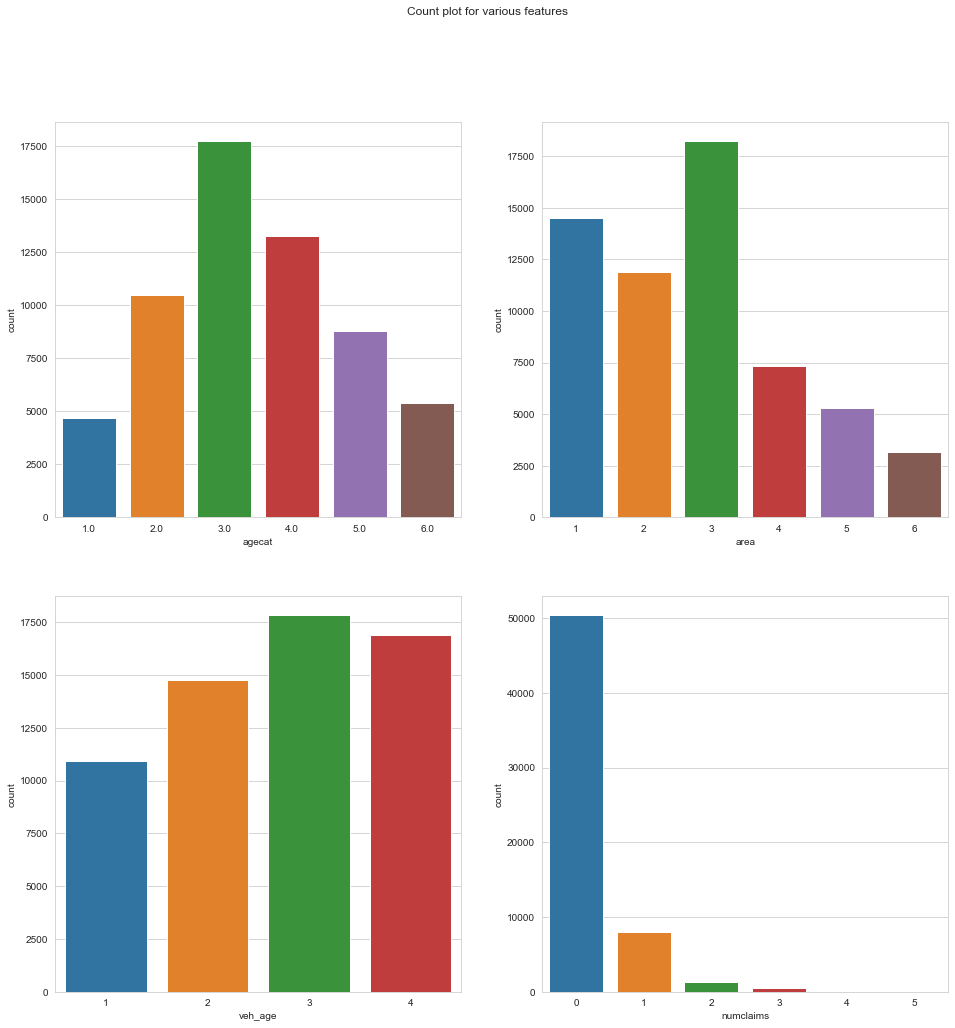

In [558]:
fig,axes = plt.subplots(2,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various features")

sns.countplot(ax=axes[0,0],data=dftrain_enc,x='agecat')
sns.countplot(ax=axes[0,1],data=dftrain_enc,x='area')
sns.countplot(ax=axes[1,0],data=dftrain_enc,x='veh_age')
sns.countplot(ax=axes[1,1],data=dftrain_enc,x='numclaims')

# Applying Undersampling technique to balance numclaims column values

In [720]:
# Define X to be the entire dataset. We do not separate X and y in this case since we need X and y
# to be in the same dataset to count the class values
Xu = dftrain_enc

# Create training and test sets only for X and not y
Xu_train, Xu_test = train_test_split(Xu, test_size=.25, random_state=0)

In [721]:
# getting the count for each numclaim value
Xu_train['numclaims'].value_counts()

0    37723
1     6037
2     1047
3      332
4      110
5       45
Name: numclaims, dtype: int64

In [722]:
# Undersample Class 1 randomly by selecting 10% of the rows randomly
class_0 = Xu_train[Xu_train['numclaims'] == 0]
class_0_under = class_0.sample(round(0.05*len(class_0)))
class_0_under.shape

# Undersample Class 2 randomly by selecting 60% of the rows randomly
class_1 = Xu_train[Xu_train['numclaims'] == 1]
class_1_under = class_1.sample(round(0.20*len(class_1)))
class_1_under.shape

(1207, 25)

In [723]:
# Remove the rows that correspond to class = 1 and class = 2 in the training dataset
Xu_train = Xu_train[Xu_train.numclaims != 0]
Xu_train = Xu_train[Xu_train.numclaims != 1]

In [724]:
# Add the undersample class 1 and class 2 to the X_train to create a new dataset called X_train_balanced.
Xu_train_balanced = Xu_train.append([class_0_under, class_1_under])
Xu_train_balanced['numclaims'].value_counts()

0    1886
1    1207
2    1047
3     332
4     110
5      45
Name: numclaims, dtype: int64

# Plot on Balanaced Train Data i.e., after sampling

<AxesSubplot:xlabel='numclaims', ylabel='count'>

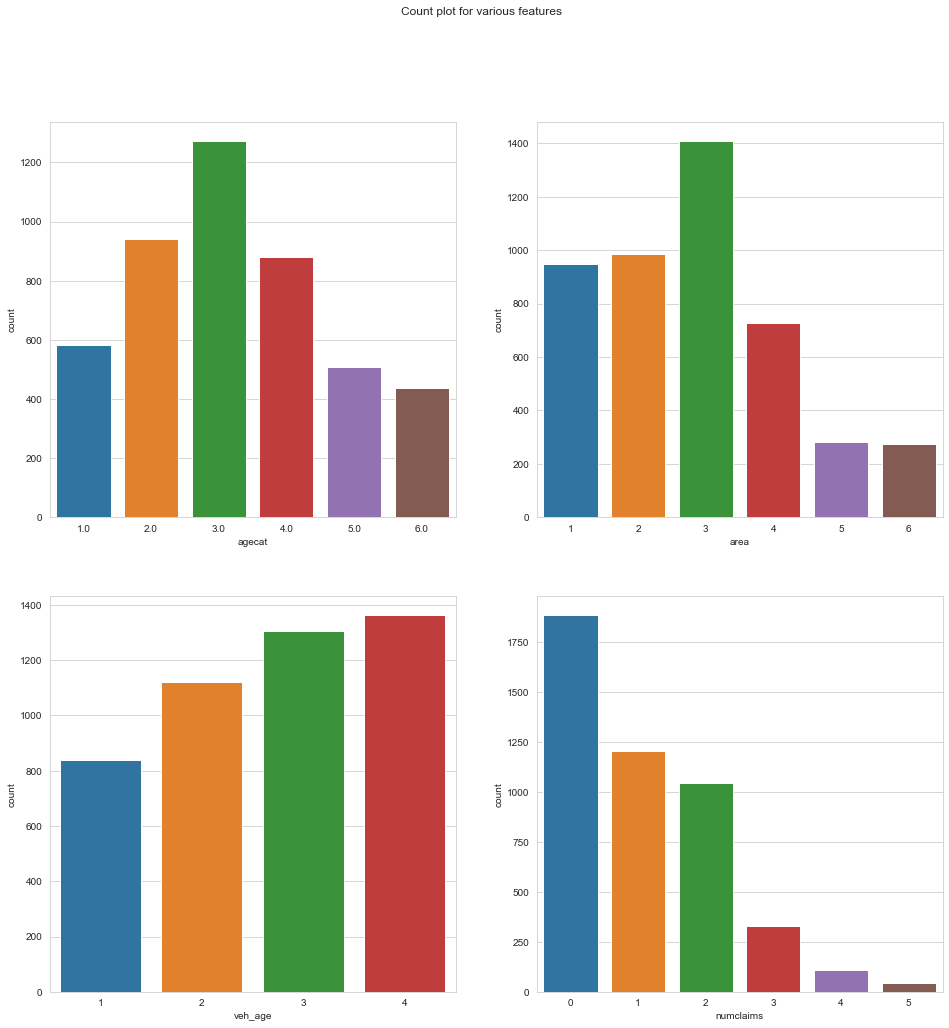

In [725]:
fig,axes = plt.subplots(2,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various features")

sns.countplot(ax=axes[0,0],data=Xu_train_balanced,x='agecat')
sns.countplot(ax=axes[0,1],data=Xu_train_balanced,x='area')
sns.countplot(ax=axes[1,0],data=Xu_train_balanced,x='veh_age')
sns.countplot(ax=axes[1,1],data=Xu_train_balanced,x='numclaims')

# Feature Selection - numclaims

In [745]:
# splitting the balanced train dataset into train and test sets, previously splitted test dataset into train and test sets
X_train = Xu_train_balanced.drop(['numclaims','claimcst0'],axis=1)
y_train = Xu_train_balanced.numclaims
X_test = Xu_test.drop(['numclaims','claimcst0'],axis=1)
y_test = Xu_test.numclaims

In [746]:
# Using a statistical (chi-squared) test
# Including packages in the code is not good programming practices
# however, I am doing it to illustrate which package I am using
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Defining to select the best k features using chi-squared
selector = SelectKBest(chi2, k = 20)

# Creating new dataset with selected features
X_train_new = selector.fit_transform(X_train, y_train)

# See which features were selected
m = selector.get_support()

# Apply transformation to the test set
X_test_new = selector.transform(X_test)
m

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True])

# Applying ML Model to Predict Performance on Train dataset for numclaims column

In [747]:
# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to all numeric data
X_scaled3_train = scaler.fit_transform(X_train_new)
X_scaled3_test = scaler.fit_transform(X_test_new)
#X_scaled3_test = scaler.fit_transform(dftest_enc)

In [748]:
# initiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=20)

# fit the data
knn = knn.fit(X_scaled3_train, y_train)

# predict the data
y_pred_knn = knn.predict(X_scaled3_test)

# print accuracy and f1_score
print(precision_score(y_pred_knn,y_test, average = "weighted"), "Precision")
print(f1_score(y_pred_knn,y_test, average = "weighted"), "f1_score")

# print confusion matrix
confusion_matrix(y_pred_knn,y_test)

0.6619674671364938 Precision
0.6805220759210201 f1_score


array([[9978,  830,  117,   47,   20,    0],
       [1690,  790,  120,   65,   11,    5],
       [ 969,  377,   52,   15,    8,    2],
       [   2,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0]], dtype=int64)

# Feature Selection - claimcst0

In [749]:
X1_train = Xu_train_balanced.drop(['numclaims','claimcst0'],axis=1)
y1_train = Xu_train_balanced.claimcst0.astype('int')
X1_test = Xu_test.drop(['numclaims','claimcst0'],axis=1)
y1_test = Xu_test.claimcst0.astype('int')

In [750]:
# Using a statistical (chi-squared) test
# Including packages in the code is not good programming practices
# however, I am doing it to illustrate which package I am using
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Defining to select the best k features using chi-squared
selector = SelectKBest(chi2, k = 20)

# Creating new dataset with selected features
X1_train_new = selector.fit_transform(X1_train, y1_train)

# See which features were selected
n = selector.get_support()

# Apply transformation to the test set
X1_test_new = selector.transform(X1_test)
n

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False])

# Applying ML Model to Predict Performance on Train dataset for claimcst0 column

In [751]:
# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to all numeric data
X1_scaled3_train = scaler.fit_transform(X1_train_new)
X1_scaled3_test = scaler.fit_transform(X1_test_new)

In [752]:
# initiate KNN regressor
knn = KNeighborsRegressor(n_neighbors=20)

# fit the data
knn = knn.fit(X1_scaled3_train, y1_train)

# predict the data
y1_pred_knn = knn.predict(X1_scaled3_test)

# print MAE and MSE values
print(mean_absolute_error(y1_pred_knn,y1_test), "MAE")

2494.0450523248114 MAE


# Feature Selection using original test dataset to predict numclaims column values

In [753]:
# Remove features that are strings and create X and y datasets i.e. y is the response X is the feature matrix
X1_train = Xu_train_balanced.drop(['numclaims','claimcst0'],axis=1)
y1_train = Xu_train_balanced.numclaims

#Xp = dftest_enc
#X1_test, y1_test = train_test_split(Xp, test_size=.25, random_state=3)

In [762]:
# Using a statistical (chi-squared) test
# Including packages in the code is not good programming practices
# however, I am doing it to illustrate which package I am using
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Defining to select the best k features using chi-squared
selector = SelectKBest(chi2, k = 20)

# Creating new dataset with selected features
X1_train_new = selector.fit_transform(X1_train, y1_train)

# See which features were selected
m1 = selector.get_support()

# Apply transformation to the test set
X1_test_new = selector.transform(dftest_enc)
m1

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True])

# Applying ML Model to predict numclaims column values

In [770]:
# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to all numeric data
X1_scaled3_train = scaler.fit_transform(X1_train_new)
X1_scaled3_test = scaler.fit_transform(X1_test_new)
#X_scaled3_test = scaler.fit_transform(dftest_enc)

In [771]:
# initiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# fit the data
knn = knn.fit(X1_scaled3_train, y1_train)

# predict the data
y1_pred_knn = knn.predict(X1_scaled3_test)

# print the predictions
y1_pred_knn

array([0, 1, 4, ..., 1, 1, 2], dtype=int64)

In [772]:
np.unique(y1_pred_knn)

array([0, 1, 2, 3, 4, 5], dtype=int64)

# Feature Selection using original test dataset to predict claimcst0 column values

In [773]:
# Remove features that are strings and create X and y datasets i.e. y is the response X is the feature matrix
X2_train = Xu_train_balanced.drop(['numclaims','claimcst0'],axis=1)
y2_train = Xu_train_balanced.claimcst0.astype('int')

#Xp = dftest_enc
#X1_test, y1_test = train_test_split(Xp, test_size=.25, random_state=3)

In [774]:
# Using a statistical (chi-squared) test
# Including packages in the code is not good programming practices
# however, I am doing it to illustrate which package I am using
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Defining to select the best k features using chi-squared
selector = SelectKBest(chi2, k = 20)

# Creating new dataset with selected features
X2_train_new = selector.fit_transform(X2_train, y2_train)

# See which features were selected
n1 = selector.get_support()

# Apply transformation to the test set
X2_test_new = selector.transform(dftest_enc)
n1

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False])

# Applying ML Model to predict claimcst0 column values

In [775]:
# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to all numeric data
X2_scaled3_train = scaler.fit_transform(X2_train_new)
X2_scaled3_test = scaler.fit_transform(X2_test_new)

In [776]:
# initiate KNN regressor
knn = KNeighborsRegressor(n_neighbors=1)
#knn = DecisionTreeRegressor()

# fit the data
knn = knn.fit(X2_scaled3_train, y2_train)

# predict the data
y2_pred_knn = knn.predict(X2_scaled3_test)

# print the predictions
y2_pred_knn

array([    0.,   604.,  1817., ...,     0., 17082.,  3138.])

# Adding the predicted columns to original test dataset and saving the CSV file

In [777]:
# adding predicted numclaims column to original test dataset
dftest['numclaims'] = y1_pred_knn

# adding predicted claimcst0 column to original test dataset
dftest['claimcst0'] = y2_pred_knn

# saving the new file with predicted columns in csv format
dftest.to_csv('potential_customers_S.csv')

# Summary Statistics

In [783]:
dftest.describe()

,pol_number,agecat,credit_score,area,traffic_index,veh_age,veh_value,person_age,numclaims,claimcst0
count,7.464000e+03,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000
mean,5.504566e+07,3.430600,661.321846,2.763398,104.416636,2.671758,1.943977,51.837219,0.860531,2291.508039
std,2.605332e+07,1.374138,132.110047,1.436781,32.883557,1.063432,1.288601,15.508104,1.096314,6086.197444
min,1.000528e+07,1.000000,301.000000,1.000000,0.000000,1.000000,0.000000,-7.000000,0.000000,0.000000
25%,3.238049e+07,2.000000,604.000000,2.000000,82.800000,2.000000,1.111000,40.000000,0.000000,0.000000
50%,5.505358e+07,3.000000,671.000000,3.000000,105.000000,3.000000,1.639000,51.000000,0.000000,148.000000
75%,7.788507e+07,4.000000,765.000000,4.000000,132.000000,4.000000,2.354000,62.000000,2.000000,1802.250000
max,9.997137e+07,6.000000,850.000000,6.000000,223.700000,4.000000,18.700000,97.000000,5.000000,65309.000000


# Visualization

<AxesSubplot:xlabel='numclaims', ylabel='count'>

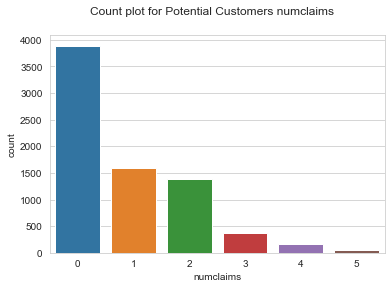

In [780]:
fig,axes = plt.subplots()
sns.set_style('whitegrid')
fig.suptitle("Count plot for Potential Customers numclaims")

sns.countplot(data=dftest,x='numclaims')

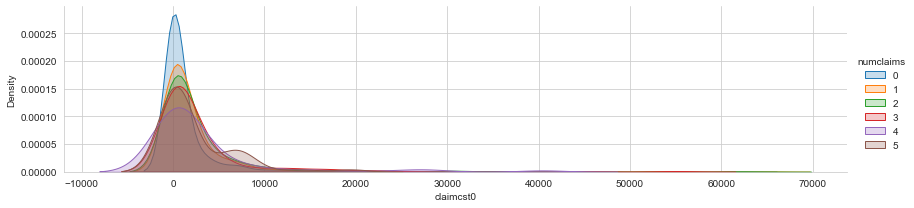

In [781]:
# numclaims and claimcost density
fig = sns.FacetGrid(data=dftest, hue="numclaims", aspect=4)
fig.map(sns.kdeplot, "claimcst0", shade=True)
fig.add_legend()